Le but de ce TP est de créer un modèle capable de reconnaître (classer) des images de chiffres écrits à la main. MNIST est un jeu de données connu comportant de telles images. <br>
Nous allons entraîner pour cela un Support Vector Classifier, qui est un modèle plutôt gourmand (du moins pour certains "noyaux").<br>
Pour prototyper notre modèle et notre script, nous allons travailler dans un premier temps sur un jeu de données "léger".

Cellule des imports :

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

Trouver comment récupérer le jeu de données des chiffres écrits à la main (hand-written digits en Shakespeare) de scitkit-learn.

In [39]:
digits = load_digits()

Vérifier le type et la taille du jeu de données.

In [40]:
type(digits)

sklearn.utils._bunch.Bunch

In [41]:
digit_images = digits.images
X = digit_images.reshape(digit_images.shape[0], 64)
X.shape

(1797, 64)

In [42]:
y = digits.target

Afficher les 5 premières images du jeu, ainsi que le label associé (label = la vraie valeur du chiffre correspondant à l'image).

In [43]:
X[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [44]:
y[:]

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

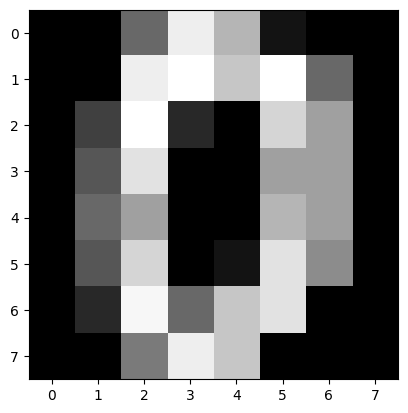

In [45]:
plt.imshow(digit_images[0], cmap="Greys_r")
plt.show()

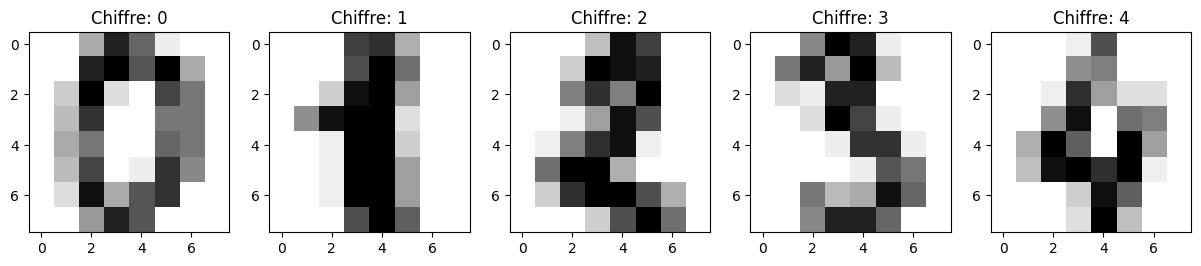

In [46]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for axis, image, label in zip(axes, digit_images, y):
    axis.imshow(image, cmap="gray_r")
    axis.set_title(f"Chiffre: {label}")
plt.show()

Séparer le jeu de données en un jeu d'entraînement et un jeu de test (vous pouvez utiliser la fonction train_test_split de sklearn.model_selection pour cela). Adopter le nommage suivant :
- X_train pour les données explicatives (ici les images) du jeu d'entraînement,
- y_train pour les labels du jeu d'entraînement,
- X_test pour les données explicatives (ici les images) du jeu de test,
- y_test pour les labels du jeu de test.

Chaque image devra être représentée sur une seule dimension (et X_train et X_test auront 2 dimensions : nombre d'images x nombre de pixels). Si cette consigne n'est pas déjà vérifiée, redimensionner les jeux X_train et X_test de sorte à "aplatir" chaque image, grâce à votre connaissance pointue de NumPy (ou de la langue de Shakespeare). 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1,
)

In [48]:
X_train.shape

(1437, 64)

En fouillant dans scikit-learn, instancier un Support Vector Classifier. Utiliser le paramètre de régularisation par défaut. Choisir le kernel rbf associé à un coefficient de 0,002.

In [57]:
svc = SVC(kernel="rbf", gamma=0.002)

Entraîner le modèle sur le jeu d'entraînement. Vous pouvez à nouveau consulter la documentation de scikit-learn. Ce modèle respecte l'API scikit-learn (comme l'ensemble des modèles fournis par scikit-learn). Ne pas oublier de revenir au jeu de données initial lorsque le code sera fonctionnel !

In [50]:
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,0.002
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Prédire les valeurs des images du jeu de test.

In [51]:
y_pred = svc.predict(X_test)

Visualiser les prédictions ainsi que les valeurs réelles pour les 5 premières images du jeu de test.

In [52]:
y_test[:5]

array([1, 5, 0, 7, 1])

In [53]:
y_pred[:5]

array([1, 5, 0, 7, 1])

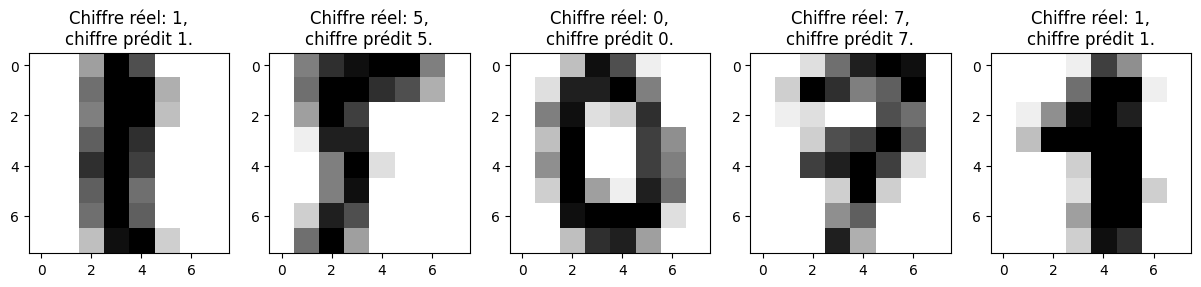

In [54]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for axis, image, label, pred in zip(axes, X_test, y_test, y_pred):
    axis.imshow(image.reshape(8, 8), cmap="gray_r")
    axis.set_title(f"Chiffre réel: {label},\nchiffre prédit {pred}.")
plt.show()

Afficher la "matrice de confusion" associée aux vecteurs de prédictions et de labels du jeu de test.

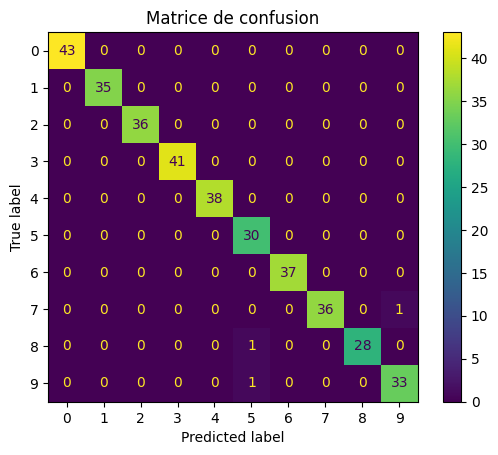

In [55]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
)
plt.title("Matrice de confusion")
plt.show()

De même, afficher le "rapport de classification".

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       0.94      1.00      0.97        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      0.97      0.98        29
           9       0.97      0.97      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



On propose maintenant de travailler sur un jeu un peu plus fourni, et de meilleure résolution. Trouver le jeu de données original MNIST dans tensorflow.keras. Travailler sur un échantillon d'entraînement de 10000 images. Adapter le code précédent lorsque nécessaire. Préférer un noyau linéaire. L'exécution va prendre un temps non négligeable. Pendant ce temps, à partir de la doc de son jumeau SVR (https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html), trouver un O de la complexité algorithmique du fit de ces modèles.

In [21]:
from tensorflow.keras.datasets import mnist

In [22]:
data = mnist.load_data()

In [23]:
(X_train, y_train), (X_test, y_test) = data

In [28]:
n_samples = 10000

In [29]:
X_train = X_train.reshape(X_train.shape[0], -1)[:n_samples]
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train[:n_samples]

In [30]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


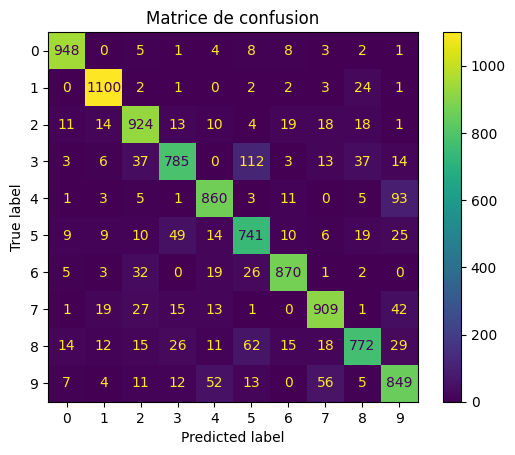

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.94      0.97      0.95      1135
           2       0.87      0.90      0.88      1032
           3       0.87      0.78      0.82      1010
           4       0.87      0.88      0.88       982
           5       0.76      0.83      0.80       892
           6       0.93      0.91      0.92       958
           7       0.89      0.88      0.88      1028
           8       0.87      0.79      0.83       974
           9       0.80      0.84      0.82      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



In [31]:
y_pred = svc.predict(X_test)
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
)
plt.title("Matrice de confusion")
plt.show()
print(classification_report(y_test, y_pred))